# Insurance claim prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(20)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

# Data Preprocessing

In [5]:
#checking if there are any null values
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [6]:
df.shape

(595212, 59)

In [7]:
#checking if there are any duplicates
df.duplicated().sum()

0

In [8]:
#checking which columns are categoriacl and which columns are countinous
df.nunique()

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          5
ps_ind_03             12
ps_ind_04_cat          3
ps_ind_05_cat          8
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5013
ps_car_01_cat         13
ps_car_02_cat          3
ps_car_03_cat          3
ps_car_04_cat         10
ps_car_05_cat          3
ps_car_06_cat         18
ps_car_07_cat          3
ps_car_08_cat          2
ps_car_09_cat          6
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              5
ps_car_12            184
ps_car_13          70482
ps_car_14            850
ps_car_15             15
ps_calc_01            10


In [9]:
# counting how many negative values are there
count = (df < 0).sum().sum()

In [10]:
count

846458

In [11]:
#converting negative to positive
df = abs(df)

In [12]:
count1 = (df < 0).sum().sum()
count1

0

In [13]:
#shifting the target column to end
mid = df['target']
df.drop(labels=['target'], axis=1, inplace = True)
df.insert(58, 'target', mid)
df

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,7.0,2.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,9.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,13.0,5.0,4.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,16.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013.0,3.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,9.0,6.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
595208,1488016.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,8.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
595209,1488017.0,1.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
595210,1488021.0,5.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [14]:
count2 = (df < 0).sum().sum()
count2

0

In [15]:
df.astype(int)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,7,2,2,5,1,0,0,1,0,0,...,1,5,8,0,1,1,0,0,1,0
1,9,1,1,7,0,0,0,0,1,0,...,1,1,9,0,1,1,0,1,0,0
2,13,5,4,9,1,0,0,0,1,0,...,2,7,7,0,1,1,0,1,0,0
3,16,0,1,2,0,0,1,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,1,1,3,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,3,1,10,0,0,0,0,0,1,...,1,9,6,0,1,1,0,1,1,0
595208,1488016,5,1,3,0,0,0,0,0,1,...,1,3,8,1,0,1,0,1,1,0
595209,1488017,1,1,10,0,0,1,0,0,0,...,2,2,6,0,0,1,0,0,0,0
595210,1488021,5,2,3,1,0,0,0,1,0,...,1,4,2,0,1,1,1,0,0,0


# Data Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

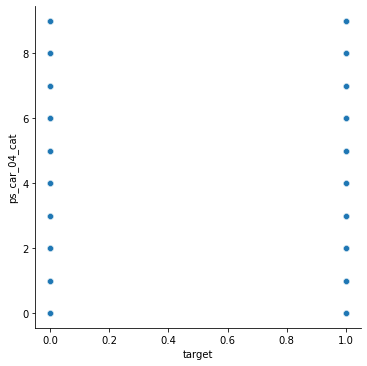

In [17]:
sns.relplot(x="target",y="ps_car_04_cat",data=df)

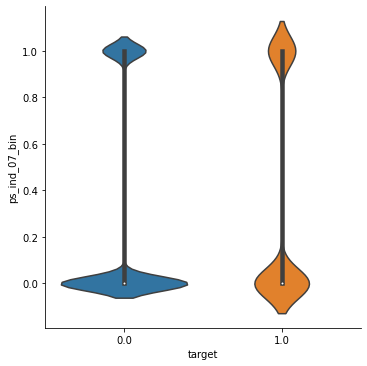

In [18]:
sns.catplot(x="target",y="ps_ind_07_bin",kind="violin",data=df)

<AxesSubplot:>

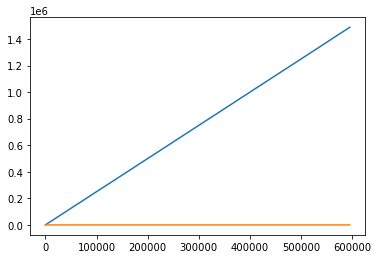

In [19]:
df.id.plot()
df.target.plot()

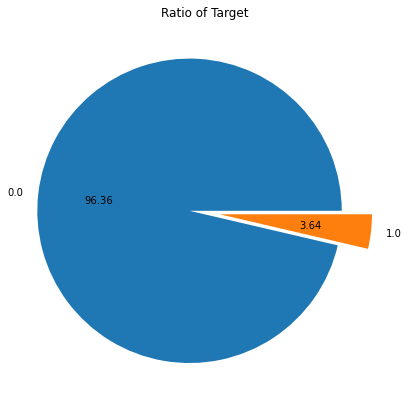

In [20]:
# found how much of the target does 0 and 1 take
plt.figure(figsize=(7, 7))
plt.pie(df.target.value_counts(), [0.1,0.1], labels=df.target.value_counts().index, autopct= '%0.2f')
plt.title('Ratio of Target')
plt.show()

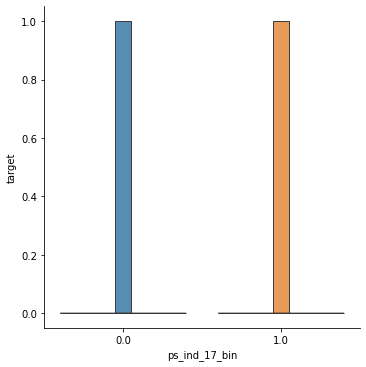

In [21]:
sns.catplot(x="ps_ind_17_bin",y="target",kind="boxen",data=df)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ps_ind_01', ylabel='Density'>

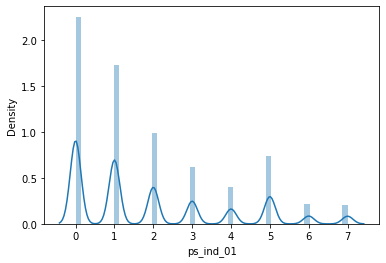

In [22]:
sns.distplot(df.ps_ind_01)

#  Feature Selection

## chi square test

In [23]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,7.0,2.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,9.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,13.0,5.0,4.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,16.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [25]:
df.astype(int)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,7,2,2,5,1,0,0,1,0,0,...,1,5,8,0,1,1,0,0,1,0
1,9,1,1,7,0,0,0,0,1,0,...,1,1,9,0,1,1,0,1,0,0
2,13,5,4,9,1,0,0,0,1,0,...,2,7,7,0,1,1,0,1,0,0
3,16,0,1,2,0,0,1,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,1,1,3,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,3,1,10,0,0,0,0,0,1,...,1,9,6,0,1,1,0,1,1,0
595208,1488016,5,1,3,0,0,0,0,0,1,...,1,3,8,1,0,1,0,1,1,0
595209,1488017,1,1,10,0,0,1,0,0,0,...,2,2,6,0,0,1,0,0,0,0
595210,1488021,5,2,3,1,0,0,0,1,0,...,1,4,2,0,1,1,1,0,0,0


In [26]:
df.set_index("id")

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
id,,,,,,,,,,,,,,,,,,,,,
7.0,2.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
13.0,5.0,4.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
16.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013.0,3.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,9.0,6.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1488016.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,8.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1488017.0,1.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
X = df.iloc[:,:-1]

In [28]:
y=df.target

In [29]:
X.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7.0,2.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13.0,5.0,4.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [30]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [31]:
# creating new columns with names of column and alongside with scores .
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [32]:
#adding the columns to the dataset
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [50]:
#dispalying the scores for each column 
featureScores

,Specs,Score
0,id,5240.607646
1,ps_ind_01,425.067389
2,ps_ind_02_cat,5.639435
3,ps_ind_03,68.547048
4,ps_ind_04_cat,37.925214
5,ps_ind_05_cat,2747.051484
6,ps_ind_06_bin,417.558962
7,ps_ind_07_bin,517.788573
8,ps_ind_08_bin,86.014303
9,ps_ind_09_bin,32.899261


# selected top 10 rows which impact on the target

In [34]:
print(featureScores.nlargest(11,'Score')) 

            Specs        Score
0              id  5240.607646
25  ps_car_04_cat  4119.848102
5   ps_ind_05_cat  2747.051484
17  ps_ind_17_bin   718.220742
7   ps_ind_07_bin   517.788573
15      ps_ind_15   474.207871
1       ps_ind_01   425.067389
6   ps_ind_06_bin   417.558962
32  ps_car_11_cat   391.631352
27  ps_car_06_cat   365.754306
20      ps_reg_02   268.234011


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  float64
 1   ps_ind_01       595212 non-null  float64
 2   ps_ind_02_cat   595212 non-null  float64
 3   ps_ind_03       595212 non-null  float64
 4   ps_ind_04_cat   595212 non-null  float64
 5   ps_ind_05_cat   595212 non-null  float64
 6   ps_ind_06_bin   595212 non-null  float64
 7   ps_ind_07_bin   595212 non-null  float64
 8   ps_ind_08_bin   595212 non-null  float64
 9   ps_ind_09_bin   595212 non-null  float64
 10  ps_ind_10_bin   595212 non-null  float64
 11  ps_ind_11_bin   595212 non-null  float64
 12  ps_ind_12_bin   595212 non-null  float64
 13  ps_ind_13_bin   595212 non-null  float64
 14  ps_ind_14       595212 non-null  float64
 15  ps_ind_15       595212 non-null  float64
 16  ps_ind_16_bin   595212 non-null  float64
 17  ps_ind_17_

In [36]:
df.astype(int)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,7,2,2,5,1,0,0,1,0,0,...,1,5,8,0,1,1,0,0,1,0
1,9,1,1,7,0,0,0,0,1,0,...,1,1,9,0,1,1,0,1,0,0
2,13,5,4,9,1,0,0,0,1,0,...,2,7,7,0,1,1,0,1,0,0
3,16,0,1,2,0,0,1,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,1,1,3,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,3,1,10,0,0,0,0,0,1,...,1,9,6,0,1,1,0,1,1,0
595208,1488016,5,1,3,0,0,0,0,0,1,...,1,3,8,1,0,1,0,1,1,0
595209,1488017,1,1,10,0,0,1,0,0,0,...,2,2,6,0,0,1,0,0,0,0
595210,1488021,5,2,3,1,0,0,0,1,0,...,1,4,2,0,1,1,1,0,0,0


## Correlation Heatmap

In [37]:
df1 = df.loc[:,["id","ps_car_04_cat","ps_ind_05_cat","ps_ind_17_bin","ps_ind_07_bin","ps_ind_15","ps_ind_01","ps_ind_06_bin","ps_car_11_cat","ps_car_06_cat","ps_reg_02","target"]]

<AxesSubplot:>

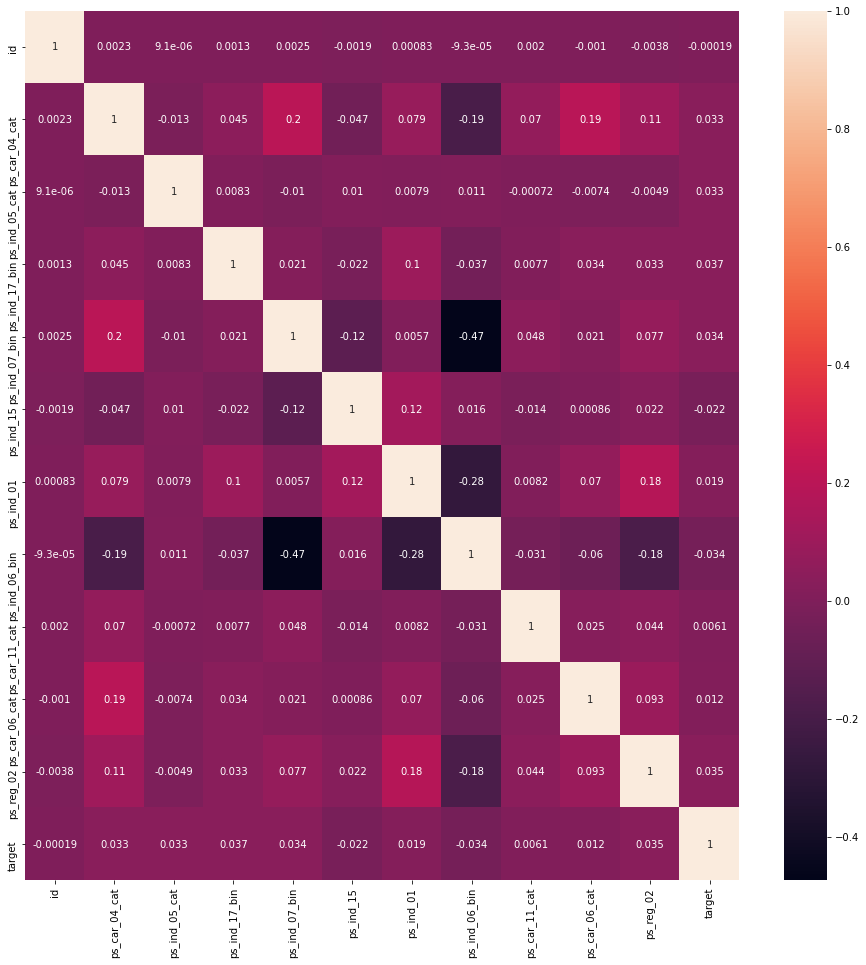

In [60]:
#plotting the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(df1.corr(), annot = True)

In [61]:
# setting the index as id
df.set_index("id")

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
id,,,,,,,,,,,,,,,,,,,,,
7.0,2.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
13.0,5.0,4.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
16.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013.0,3.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,9.0,6.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1488016.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,8.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1488017.0,1.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
X1 = X.loc[ : , ["id","ps_car_04_cat","ps_ind_05_cat","ps_ind_17_bin","ps_ind_07_bin","ps_ind_15","ps_ind_01","ps_ind_06_bin","ps_car_11_cat","ps_car_06_cat","ps_reg_02"]]

# train, test and split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.30,random_state=10)

# training the model

In [42]:
from sklearn.ensemble import RandomForestClassifier

### Randomforest Classifier

In [43]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_predict=model.predict(X_test)

# Evaluation

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9617336081180977

### Randomforest accuracy : 0.9617672095159159

In [62]:
# confusing matrix
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
target,,
0.0,171722,165
1.0,6668,9


###  XGBClassifier

In [47]:
from xgboost import XGBClassifier

model1 = XGBClassifier(
    random_state=10,
    max_depth=5,
    n_estimators=150
)

model1.fit(X_train, y_train)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_predict1=model1.predict(X_test)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict1,y_test)

0.9625904437624605

### XGB accuracy : 0.9625904437624605

## We found that XGBClassifier is a little better than RandomforesClassifier

## we tried Hyper parameter tuning but there was no improvement